In [240]:
import pandas as pd 
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [ ]:
df_transfers = pd.read_csv("./Dataset/transfers.csv")
df_club = pd.read_csv("./Dataset/clubs.csv")
df_comp = pd.read_csv("./Dataset/competitions.csv")
df_transfers.head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,200000.0,Georgios Katris
4,302215,2025-12-31,25/26,279,86,Ferencváros,Werder Bremen,0.0,1000000.0,Naby Keïta
5,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves
6,582058,2025-12-31,25/26,7964,49702,Torpedo Zhodino,Pari NN,0.0,300000.0,Kirill Glushchenkov
7,532536,2025-10-24,24/25,2451,1519,Inverness CT,Dundee United,0.0,150000.0,Jack Newman
8,1038821,2025-07-31,25/26,3837,11204,Fredrikstad,Stade Reims B,0.0,100000.0,Fallou Fall
9,34784,2025-07-01,25/26,467,123,NEC Nijmegen,Retired,NaN,150000.0,Lasse Schöne


### We focus on season 23/24

In [242]:
df_transfers = df_transfers.loc[df_transfers["transfer_season"]=="23/24",:]
df_transfers = df_transfers.loc[df_transfers["market_value_in_eur"].notna(),:]
df_transfers = df_transfers.loc[df_transfers["transfer_fee"].notna(),:]

### We will analyse only tranfers between 1st divison European Club 

We will add the column : "from_club_comp","to_club_comp"

In [243]:
df_club.head(5)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,26.4,16,51.6,7,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.4,19,73.1,18,Olimpico di Roma,70634,€-65.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,27,25.5,18,66.7,17,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [244]:
dic_club = {}
dic_country =  {}
dic_confederation = {}
df_club.set_index("club_id",inplace=True)
dic_club = df_club["domestic_competition_id"].to_dict()

In [245]:
df_transfers["to_comp_id"] = df_transfers["to_club_id"].map(dic_club)
df_transfers["from_comp_id"] = df_transfers["from_club_id"].map(dic_club)

In [246]:
df_transfers = df_transfers.loc[df_transfers["to_comp_id"].notna(),:]
df_transfers = df_transfers.loc[df_transfers["from_comp_id"].notna(),:]

In [247]:
df_comp.head(10)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...,False
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...,False
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...,False
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...,False
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...,True


In [248]:
df_comp.set_index("competition_id",inplace=True)

In [249]:
dic_country = df_comp["country_name"].to_dict()
dic_confederation = df_comp["confederation"].to_dict()

In [250]:
df_transfers["to_club_country"] = df_transfers["to_comp_id"].map(dic_country)
df_transfers["from_club_country"] = df_transfers["from_comp_id"].map(dic_country)

df_transfers["to_club_confederation"] = df_transfers["to_comp_id"].map(dic_confederation)
df_transfers["from_club_confederation"] = df_transfers["from_comp_id"].map(dic_confederation)

In [251]:
df_transfers = df_transfers.loc[df_transfers["to_club_confederation"]=="europa",:]
df_transfers = df_transfers.loc[df_transfers["from_club_confederation"]=="europa",:]


In [275]:
df_transfers_pivot = df_transfers.groupby(['from_club_country', 'to_club_country'])['transfer_fee'].sum()
df_transfers_pivot_matrix = df_transfers_pivot.unstack(fill_value=0)


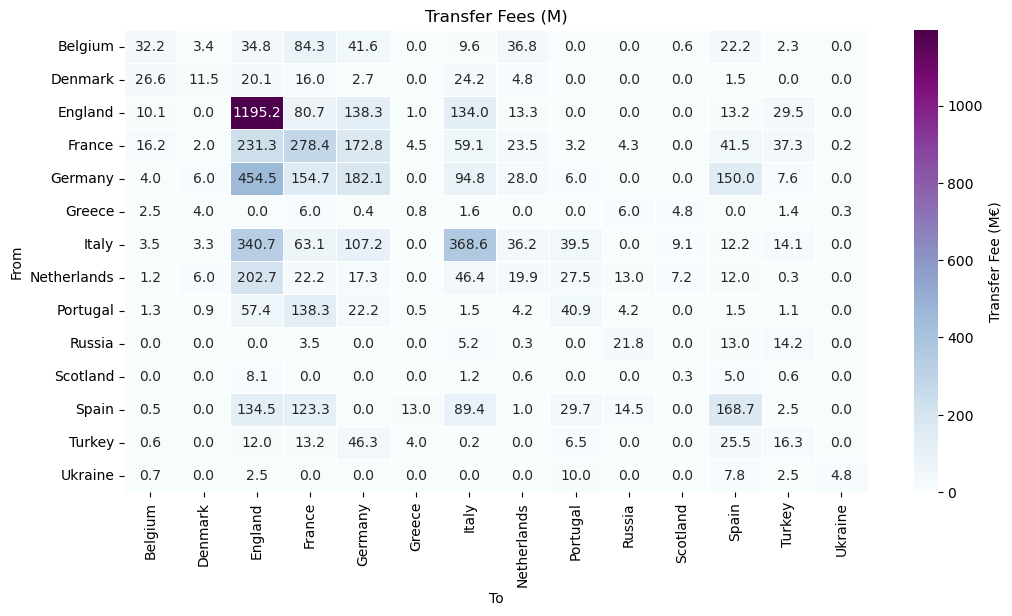

In [290]:
plt.figure(figsize=(12, 6))  
sns.heatmap(
    df_transfers_pivot_matrix/1000000, 
    annot=True,         
    fmt=".1f",
    cmap="BuPu",            
    linewidths=0.5,  
    cbar_kws={'label': 'Transfer Fee (M€)'}  
)

plt.title("Transfer Fees (M)")
plt.xlabel("To")
plt.ylabel("From")
plt.show()
